In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup # To parse html text
import json, codecs

In [2]:
def read_CSV(filename = 'LINKS.csv'):
    return pd.DataFrame.from_csv(filename)

## Thống kê số lượng bài báo theo các khía cạnh khác nhau và tính trung bình:

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import numpy as np

### tạo ra danh sách các thể loại ánh xạ từ url qua tên thể loại

In [4]:
with codecs.open('categories.json', 'r', encoding='utf-8') as fp:
    categories = json.load(fp)
    url_links = []
    
categories_dict = {}

for title1 in categories:
    
    back = categories[title1]
    
    if (isinstance(back, basestring)):
        href = back
        if(href.find('https') == -1):
            categories_dict[title1]  = href.replace(".htm",'').replace("/", "")
            
    else:
        categories_lv2 = back
        href_main = ""
        for title2 in categories_lv2:
            
            if(categories_lv2[title2].find('https') == -1):
                href_main = categories_lv2[title2].split('/')[1]
                href2 = categories_lv2[title2].split('/')[2]
                
                categories_dict[title2] = href2.replace(".htm",'')
                        
        if(href_main != ""):
            categories_dict[title1] = href_main

## đọc data từ file csv

In [5]:
df = read_CSV()

## lọc các url bị trùng do gắn nhiều tag thể loại

In [6]:
df = df.drop_duplicates(subset=['url'])
df = df.reset_index(drop=True)
df.to_csv('LINKS_FINAL.csv')

## data frame theo thể loại

In [36]:
categories_number_post = {}

for u in categories_dict:
    categories_number_post[u] = len(df[df.category == categories_dict[u]])
categories_number_post_list = [categories_number_post]

categories_df = pd.DataFrame(categories_number_post_list)
categories_df = categories_df.transpose()
categories_df.columns = ['post']
categories_df = categories_df.sort_values(by=['post'], ascending=False)
categories_df.to_csv("./statistic/categories.csv", encoding = "utf-8")

6491


## data frame theo năm

In [8]:
year_number_post = {}

for i in range(2008,2019):
    year_number_post[i] = len(df[df.year == i])
year_number_post_list = [year_number_post]

year_df = pd.DataFrame(year_number_post_list)
year_df = year_df.transpose()
year_df.columns = ['post']
year_df.to_csv("./statistic/year.csv", encoding = "utf-8")

## data frame trung bình các bài báo từng thể loại theo mỗi năm

In [61]:
categoriesr_post_per_year = {}
categoriesr_mean_per_year = {}

for u in categories_dict:
    categoriesr_year = {}
    sum_post = 0
    df_tmp = df[df.category == categories_dict[u]]
    
    for i in range(2008,2018):
        categoriesr_year[i] = len(df_tmp[df_tmp.year == i])
        sum_post += len(df_tmp[df_tmp.year == i])
    categoriesr_post_per_year[u] = categoriesr_year
    categoriesr_mean_per_year[u] = sum_post/len(categoriesr_year)

with codecs.open('categories_per_year.json', 'w', encoding='utf-8') as fp:
    json.dump(categoriesr_post_per_year, fp, ensure_ascii=False)

categoriesr_mean_per_year_list = [categoriesr_mean_per_year]

per_year_df = pd.DataFrame(categoriesr_mean_per_year_list)
per_year_df = per_year_df.transpose()
per_year_df.columns = ['post']
per_year_df = per_year_df.sort_values(by=['post'], ascending=False)
per_year_df.to_csv("./statistic/mean_year.csv", encoding = "utf-8")
per_year_df

,post
Xã hội,7879
Thế giới,4759
Văn hóa,2631
Kinh doanh,2430
Pháp luật,2317
Sức khỏe,1767
Giáo dục,1464
Nhịp sống trẻ,944
Tài chính,734
Đời sống,637


## thể hiện trên biểu đồ

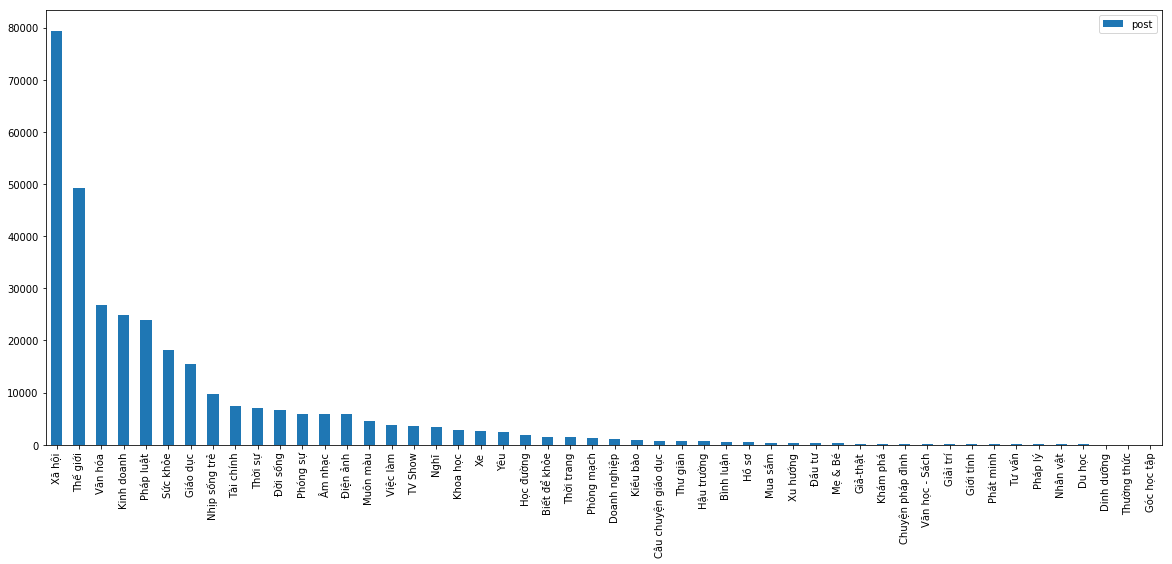

In [9]:
%matplotlib inline
categories_df.plot.bar(figsize=(20,8))

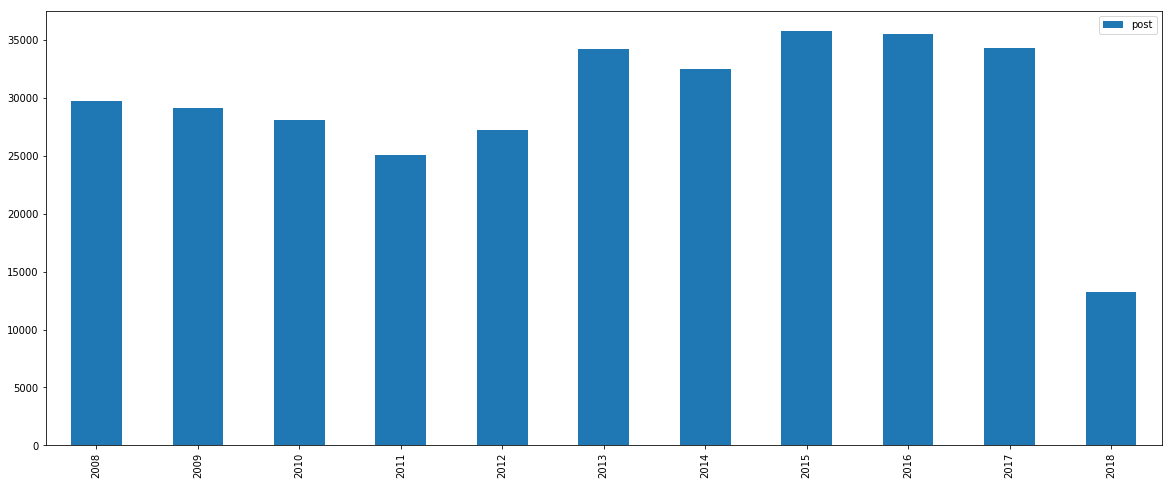

In [10]:
year_df.plot.bar(figsize=(20,8))

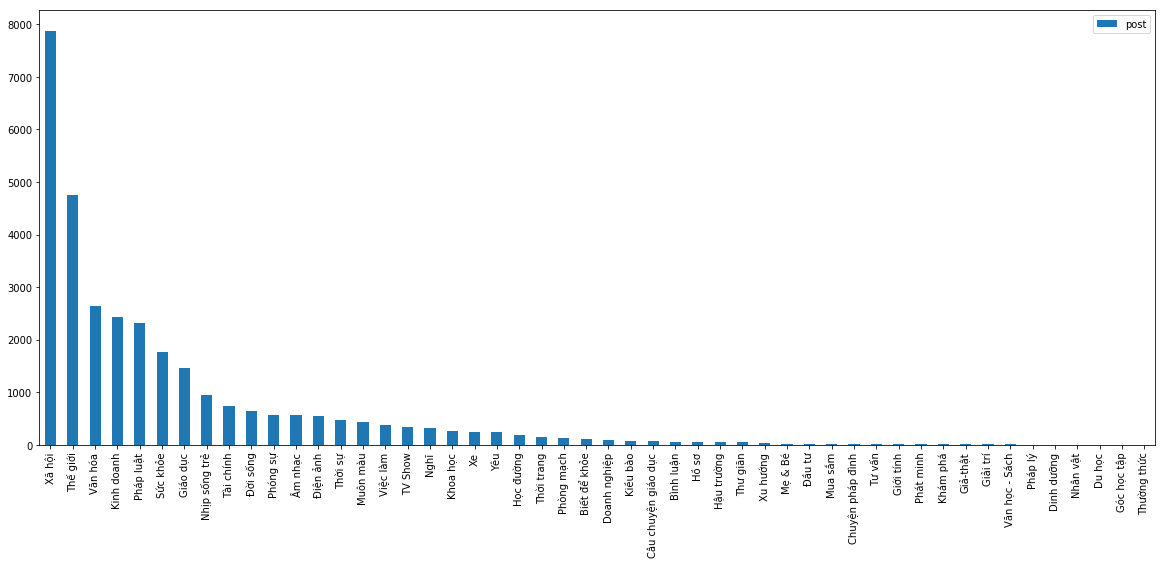

In [60]:
per_year_df.plot.bar(figsize=(20,8))

# Tính trung bình

In [37]:
int(categories_df["post"].mean())

6491

**Kết luận:** Trung bình mỗi một thể loại sẽ có 6491 bài báo.

In [14]:
int(year_df["post"].mean())

29508

**Kết luận:** Mỗi năm trung bình 29508 bài trên 1 thể loại

### Lựa chọn cho từng thể loại là 23170 bài để cân bằng số bài các thể loại có bài báo nhiều

In [63]:
NUM_OF_YEAR = 2317

## Tao DATA FRAME LINK:

In [78]:
df2 =pd.DataFrame(columns=['url','category','day','month','year'])
post = 0
for u in categories_dict:
    df_tmp = df[df.category == categories_dict[u]]
    for i in range(2008,2019):
        df_year_tmp = df_tmp[df_tmp.year == i]
        np.random.seed(None)
        perm = np.random.permutation(df_year_tmp.index)
        if(NUM_OF_YEAR > len(df_year_tmp)):
            df2 = df2.append(df_year_tmp)
            post += len(df_year_tmp)
        else:
            df2 = df2.append(df_year_tmp.ix[perm[:NUM_OF_YEAR]])
            post += NUM_OF_YEAR

E:\program\anaconda2\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [79]:
post

234554

In [81]:
df2.to_csv("GETLINKS.csv")